In [1]:
import time

import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib_inline.backend_inline
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
from matplotlib.colors import to_rgba
from torch import Tensor
from tqdm.notebook import tqdm  # Progress bar

matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf")  # For export

In [2]:
print("Using torch", torch.__version__)

Using torch 2.4.0


In [3]:
torch.manual_seed(42)  # Setting the seed

In [4]:
x = Tensor(2, 3, 4)
print(x)


tensor([[[-1.6638e+16,  2.5753e+20,  7.5879e+31,  7.2251e+28],
         [ 1.6101e+19,  4.4645e-42,  1.2348e-39,  3.4390e-12],
         [ 2.5353e+30,  2.6625e-44,  6.6169e-42,  8.3604e-03]],

        [[ 2.8958e+32,  3.7712e+30,  7.4269e-44,  1.4013e-45],
         [ 3.8904e-41,  2.4233e-38,  2.0939e-38,  4.1638e-25],
         [ 2.6774e-32, -2.6839e+30,  1.1459e-13,  2.4989e-38]]])


In [5]:
# Create a tensor from a (nested) list
x = Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [6]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


In [7]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


In [8]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


In [9]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


In [10]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)


X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


In [11]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)


X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


In [12]:
x = torch.arange(6)
print("X: ", x)

X:  tensor([0, 1, 2, 3, 4, 5])


In [13]:
x = x.view(2,3)
print(x)

tensor([[0, 1, 2],
        [3, 4, 5]])


In [14]:
x = x.permute(1,0)
x

tensor([[0, 3],
        [1, 4],
        [2, 5]])

In [15]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)


X tensor([[0, 1, 2],
        [3, 4, 5]])


In [16]:
W = torch.arange(9).view(3, 3)  # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [17]:
h = torch.matmul(x, W)  # Verify the result by calculating it by hand too!
print("h", h)


h tensor([[15, 18, 21],
        [42, 54, 66]])


In [18]:
x = torch.arange(12).view(3, 4)
print("X", x)


X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [19]:
print(x[:, 1])  # Second column




tensor([1, 5, 9])


In [20]:
print(x[0])  # First row


tensor([0, 1, 2, 3])


In [21]:
print(x[:2, -1])  # First two rows, last column

print(x[1:3, :])  # Middle two rows

tensor([3, 7])
tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [22]:
x = torch.ones((3,))
print(x.requires_grad)


False


In [23]:
x.requires_grad_(True)
print(x.requires_grad)

True


In [24]:
x=torch.arange(3, dtype=torch.float32, requires_grad=True)
print("x", x)

x tensor([0., 1., 2.], requires_grad=True)


In [25]:
a = x + 2
b = a**2
c = b+3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


In [26]:
y.backward()

In [27]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


In [28]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")


Is the GPU available? False


In [29]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)


Device cpu


In [30]:
x = torch.randn(5000, 5000)

# CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

# GPU version
if torch.cuda.is_available():
    x = x.to(device)
    # CUDA is asynchronous, so we need to use different timing functions
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    _ = torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
    print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 2.01530s


In [31]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [32]:

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        # Some init for my module

    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

In [33]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [34]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [37]:
for name, param in model.named_parameters():
    print(f"parameter {name}, shape {param.shape}")

parameter linear1.weight, shape torch.Size([4, 2])
parameter linear1.bias, shape torch.Size([4])
parameter linear2.weight, shape torch.Size([1, 4])
parameter linear2.bias, shape torch.Size([1])


In [41]:
class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):

        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        data = torch.randint(low = 0, high = 2, size = (self.size, 2), dtype = torch.float32)
        label = (data.sum(dim=1).to(torch.long))

        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label


    def __len__(self):

        return self.size
    
    def __getitem__(self, idx):

        data_point = self.data[idx]
        data_label = self.label[idx]

        return data_point, data_label




In [42]:
dataset = XORDataset(size=200)
print("Size of dataset", len(dataset))
print("datapoint 0", dataset[0])

Size of dataset 200
datapoint 0 (tensor([0.9632, 0.1117]), tensor(1))


In [43]:
def visualize_samples(data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label== 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolors="#333", label="class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolors="#333", label="class 1")
    plt.title("dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

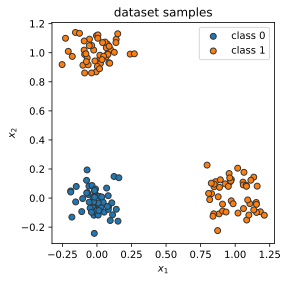

In [47]:
visualize_samples(dataset.data, dataset.label)
# plt.show()